No se construyen centrales nucleares por la
exigencia de alta inversión y tardío retorno de la
inversion frente a las renovables ​


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
import seaborn as sns
import matplotlib.dates as mdates
from scipy.stats import pearsonr
import statsmodels.api as sm

In [5]:
tecnologias = [
    "Hidroeléctrica",
    "Eólica terrestre",
    "Fotovoltaica",
    "Térmica (carbón)",
    "Nuclear",
    "Ciclo combinado"
]

# Costes de instalación en millones de euros por MW
coste_instalacion_millones_por_MW = [3.5, 1.5, 0.9, 2.5, 8.0, 1.0]

# Años de amortización
amortizacion_anios = [40, 20, 15, 30, 50, 25]

# Costes operativos en euros por MWh
coste_operativo_por_MWh = [12, 15, 10, 45, 30, 55]

# Producción anual en MWh por MW instalado
produccion_anual_MWh = [3942, 2628, 1752, 5256, 7884, 4818]

# Cálculo del LCOE
LCOE = []
for i in range(len(tecnologias)):
    capex_por_MWh = (coste_instalacion_millones_por_MW[i] * 1_000_000) / (amortizacion_anios[i] * produccion_anual_MWh[i])
    lcoe_i = capex_por_MWh + coste_operativo_por_MWh[i]
    LCOE.append(round(lcoe_i, 2))

# Mostrar resultados
for tech, lcoe in zip(tecnologias, LCOE):
    print(f"{tech}: LCOE ≈ {lcoe} €/MWh")

Hidroeléctrica: LCOE ≈ 34.2 €/MWh
Eólica terrestre: LCOE ≈ 43.54 €/MWh
Fotovoltaica: LCOE ≈ 44.25 €/MWh
Térmica (carbón): LCOE ≈ 60.85 €/MWh
Nuclear: LCOE ≈ 50.29 €/MWh
Ciclo combinado: LCOE ≈ 63.3 €/MWh


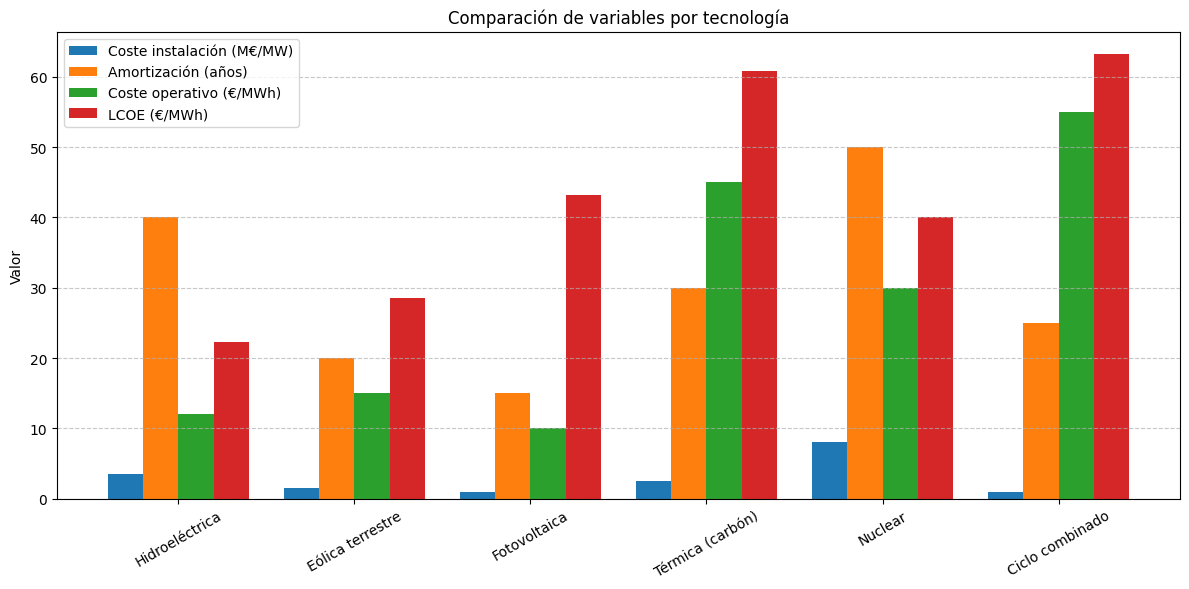

In [7]:
# Datos
tecnologias = [
    "Hidroeléctrica", "Eólica terrestre", "Fotovoltaica",
    "Térmica (carbón)", "Nuclear", "Ciclo combinado"
]

coste_instalacion = [3.5, 1.5, 0.9, 2.5, 8.0, 1.0]         # M€/MW
amortizacion = [40, 20, 15, 30, 50, 25]                    # años
coste_operativo = [12, 15, 10, 45, 30, 55]                 # €/MWh
lcoe = [22.26, 28.47, 43.24, 60.84, 40.03, 63.25]          # €/MWh

# Agrupar los datos
labels = tecnologias
x = np.arange(len(labels))  # ubicaciones de grupos
width = 0.2  # ancho de barra

fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - 1.5*width, coste_instalacion, width, label='Coste instalación (M€/MW)')
bars2 = ax.bar(x - 0.5*width, amortizacion, width, label='Amortización (años)')
bars3 = ax.bar(x + 0.5*width, coste_operativo, width, label='Coste operativo (€/MWh)')
bars4 = ax.bar(x + 1.5*width, lcoe, width, label='LCOE (€/MWh)')

# Etiquetas y formato
ax.set_ylabel('Valor')
ax.set_title('Comparación de variables por tecnología')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

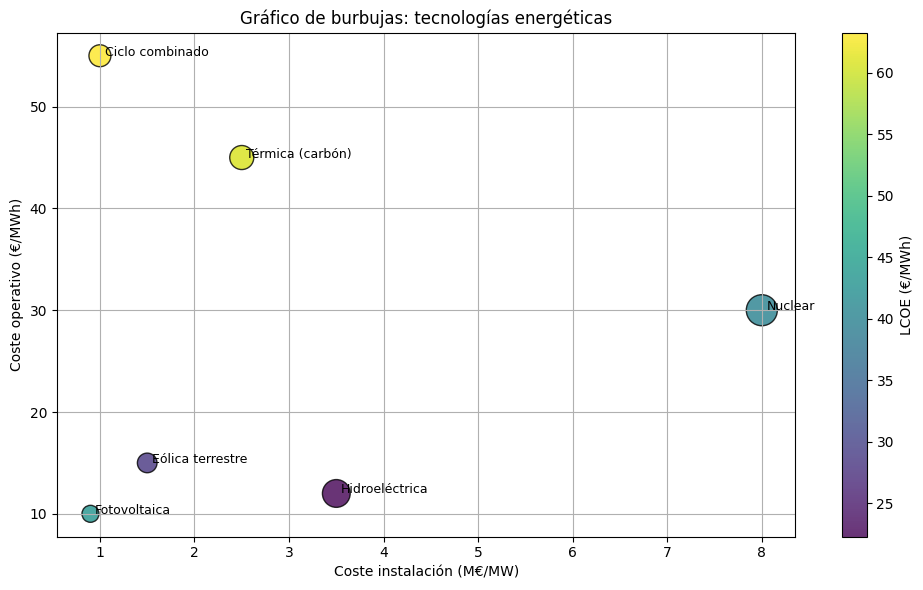

In [11]:
tecnologias = [
    "Hidroeléctrica", "Eólica terrestre", "Fotovoltaica",
    "Térmica (carbón)", "Nuclear", "Ciclo combinado"
]

coste_instalacion = [3.5, 1.5, 0.9, 2.5, 8.0, 1.0]         # M€/MW
amortizacion = [40, 20, 15, 30, 50, 25]                    # años
coste_operativo = [12, 15, 10, 45, 30, 55]                 # €/MWh
lcoe = [22.26, 28.47, 43.24, 60.84, 40.03, 63.25]          # €/MWh

# ---------------------------
# DataFrame para análisis
# ---------------------------
df = pd.DataFrame({
    "Tecnología": tecnologias,
    "Coste instalación (M€/MW)": coste_instalacion,
    "Amortización (años)": amortizacion,
    "Coste operativo (€/MWh)": coste_operativo,
    "LCOE (€/MWh)": lcoe
})


plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df["Coste instalación (M€/MW)"],
    df["Coste operativo (€/MWh)"],
    s=[a * 10 for a in df["Amortización (años)"]],  # tamaño burbuja
    c=df["LCOE (€/MWh)"], cmap='viridis', alpha=0.8, edgecolors='black'
)

plt.colorbar(scatter, label="LCOE (€/MWh)")
for i, tech in enumerate(df["Tecnología"]):
    plt.text(df["Coste instalación (M€/MW)"][i]+0.05, df["Coste operativo (€/MWh)"][i], tech, fontsize=9)

plt.xlabel("Coste instalación (M€/MW)")
plt.ylabel("Coste operativo (€/MWh)")
plt.title("Gráfico de burbujas: tecnologías energéticas")
plt.grid(True)
plt.tight_layout()
plt.show()
